# Principal Component Analysis

Below are the Principal Component Analysis on the first 10 features:

1.  index: Index for each data point
2.  sim: Index for each simulation
3.  saf: Total mass flow rate of air supply to the zone (kg/s)
4.  sat: Temperature of air supplied to the zone (°C)
5.  ewt: Exterior (South) Wall Temperature (°C)
6.  ist: Interior (North, East, and West) Walls’ Temperature (°C)
7.  wit: Window Temperature (°C)
8.  n_occ: Number of occupants in zone
9.  x: location of occupant of interest on x-axis (m)
10. y: location of occupant of interest on y-axis (m)

The last 3 features are treated as target predictions for evaluation purpose.

1. MRT:  Mean radiant temperature of the occupant of interest’s head and chest (°C)
2. T:    Average temperature of air surrounding the occupant of interest (°C)
3. V:    Average speed of air surrounding the occupant of interest occupant (°C)

In [1]:
data_loc = '../data/preprocessed/'

## Small Office

### 1. Standardize the data

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

small_office_data = pd.read_csv(data_loc+"small_office.csv")

# Remove the index column
small_office_data.drop(columns=['index', 'sim'], inplace=True)

# Seperate the data into features and labels
X = small_office_data.drop(columns=['MRT', 'T', 'V'])
y_MRT = small_office_data['MRT']
y_T = small_office_data['T']
y_V = small_office_data['V']

# Standardize the data
scaler = StandardScaler()
scaler.fit(X)

X_std = pd.DataFrame(scaler.transform(X), columns=X.columns)
X_std.describe()


,saf,sat,ewt,ist,wit,n_occ,x,y
count,6.804000e+03,6.804000e+03,6.804000e+03,6.804000e+03,6.804000e+03,6.804000e+03,6.804000e+03,6.804000e+03
mean,1.179865e-15,4.536511e-15,-4.042222e-15,8.012322e-16,-3.642263e-15,1.557703e-14,-4.951947e-16,3.662104e-15
std,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00
min,-1.153200e+00,-1.691151e+00,-1.034078e+00,-1.110044e+00,-1.109349e+00,-1.912203e+00,-1.569743e+00,-8.660254e-01
25%,-7.274033e-01,-9.101396e-01,-7.559377e-01,-8.141045e-01,-8.031388e-01,-5.275044e-01,-9.962782e-01,-8.660254e-01
50%,-1.774154e-01,1.302726e-01,-2.016575e-01,-2.243554e-01,-4.969283e-01,8.571946e-01,-2.744114e-02,-8.660254e-01
75%,5.499878e-01,6.500105e-01,9.109050e-01,8.706192e-01,1.147352e+00,8.571946e-01,9.413959e-01,1.154701e+00
max,1.508031e+00,1.170685e+00,1.745327e+00,1.758436e+00,1.837049e+00,8.571946e-01,1.516260e+00,1.154701e+00


### 2. Perform PCA

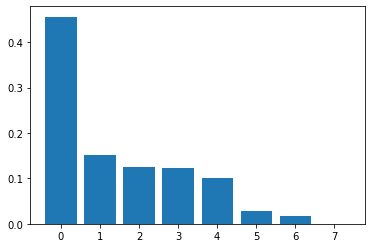

In [3]:
# Perform PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy import savetxt

pca = PCA()
pca.fit(X_std)

e_vectors = pca.components_ # The eigenvectors
evr = pca.explained_variance_ratio_ # The variance explained by each eigenvector

# Save the eigenvectors to a text file
savetxt("../reports/data/pca_small_office_eigenvectors.csv", e_vectors, delimiter=',')

plt.bar(range(len(evr)), evr)
plt.savefig('../figures/evr_pca_small_office.png')

/tmp/ipykernel_89149/2505846687.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X_pca.hist(bins=50, ax=ax)


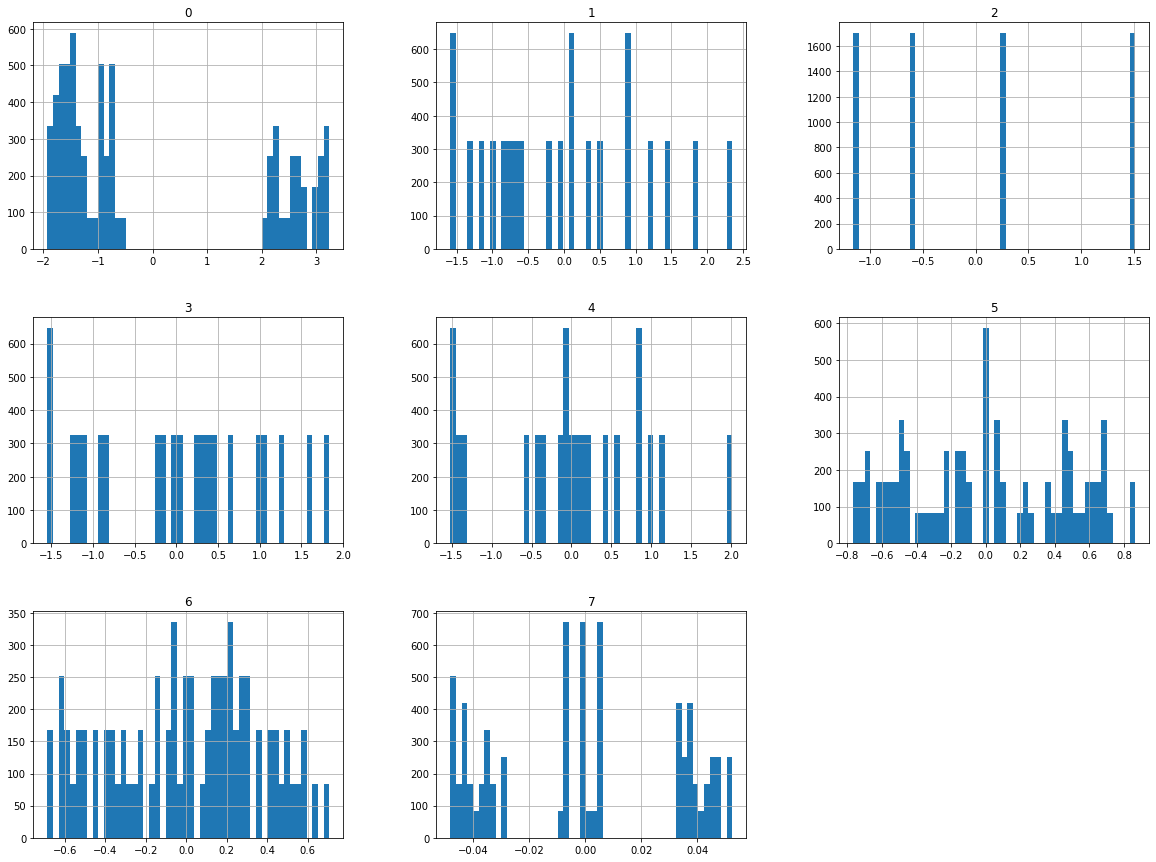

In [4]:
# Tramsform the data
X_pca = pd.DataFrame(pca.transform(X_std))
fig, ax = plt.subplots(figsize=(20,15))
X_pca.hist(bins=50, ax=ax)
fig.savefig('../figures/hist_pca_small_office.png')

After performing PCA on the features, the distribution graph shows more normal distribution features (8 features).

### 3. Compare models' results with and without PCA on predicting MRT

#### 3.1 Split the data into training and testing

In [5]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

# Without PCA
X_train, X_test, y_train, y_test = train_test_split(X_std, y_MRT, test_size=0.2, random_state=42)

# With PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_MRT, test_size=0.2, random_state=42)

#### 3.2 Train and evaluate the Linear Regression model

##### 3.2.1 Without PCA

Training time: 0.009639263153076172s
Mean squared error: 0.4468471967271326


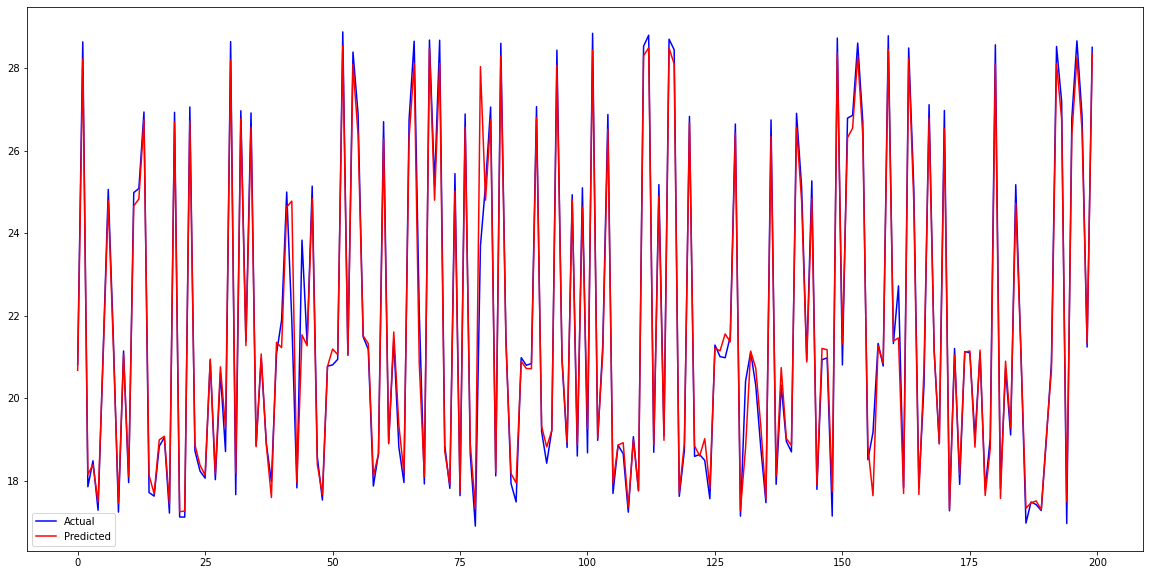

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle
import time

# Train linear regression model on training data
model = LinearRegression()
start = time.time()
model.fit(X_train, y_train)
stop = time.time()
lr_train_time = stop - start
print(f"Training time: {lr_train_time}s")

# Save the model to a pickle file
filename = '../reports/models/lr_MRT_small_office_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred[:200], color='red', label='Predicted')
plt.legend()
plt.show()

##### 3.2.2 With PCA

Training time: 0.007021188735961914s
Mean squared error: 0.44684719672713213


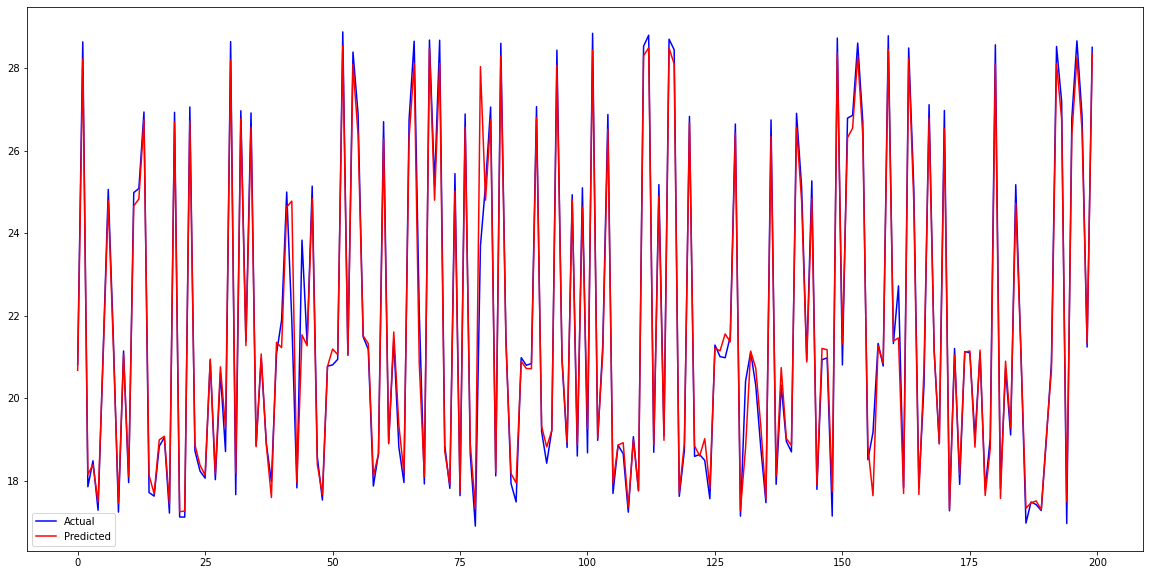

In [7]:
# Train linear regression model on training data
start = time.time()
model.fit(X_train_pca, y_train_pca)
stop = time.time()
lr_pca_train_time = stop - start
print(f"Training time: {lr_pca_train_time}s")

# Predict on test data
y_pred_pca = model.predict(X_test_pca)

# Save the model to a pickle file
filename = '../reports/models/lr_MRT_pca_small_office_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred_pca)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test_pca[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_pca[:200], color='red', label='Predicted')
plt.legend()
plt.show()

#### 3.3 Train and evaluate the Feedforward Neural Network model

##### 3.2.1 Without PCA

2022-01-18 22:26:42.903428: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-01-18 22:26:46.144988: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-01-18 22:26:46.217934: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-18 22:26:46.218518: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GeForce GTX 1060 6GB computeCapability: 6.1
coreClock: 1.7845GHz coreCount: 10 deviceMemorySize: 5.93GiB deviceMemoryBandwidth: 178.99GiB/s
2022-01-18 22:26:46.218566: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-01-18 22:26:46.308605: I tensorflow/stream_executor/pla

Training time: 66.49229383468628s
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


2022-01-18 22:27:55.915142: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../reports/models/nn_MRT_small_office_model.pkl/assets
Mean squared error: 0.06137310958422803


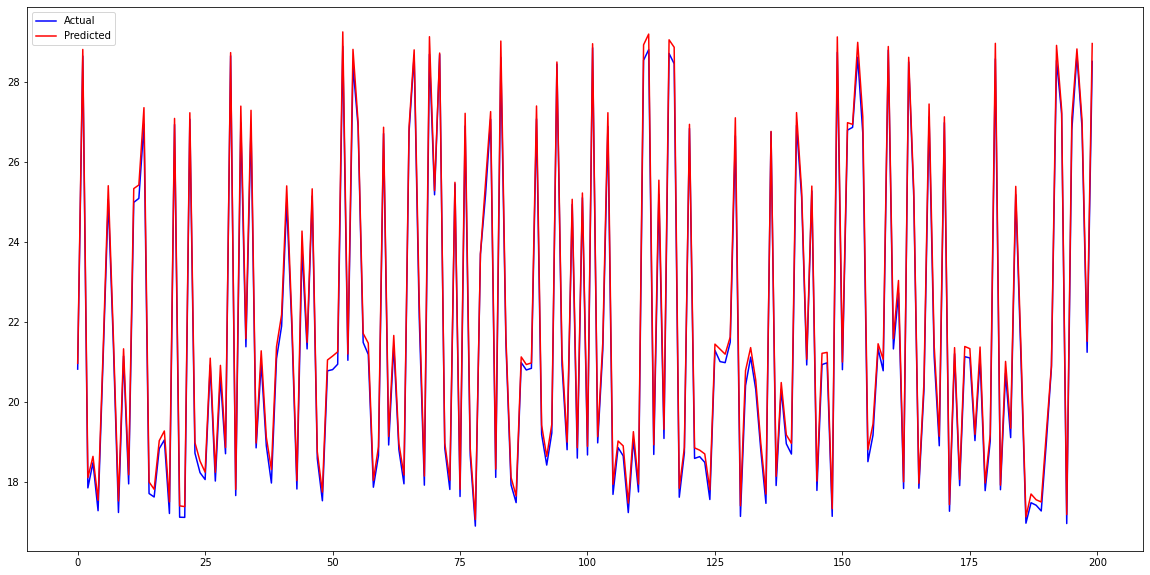

In [8]:
# Create neural network model 
from keras.models import Sequential
from keras.layers import Dense

N_NEURONS = 1024
N_LAYERS = 4

model = Sequential()
model.add(Dense(units=N_NEURONS, input_dim=X.shape[1], activation='relu'))
for i in range(N_LAYERS-1):
    model.add(Dense(units=N_NEURONS, activation='relu'))
model.add(Dense(units=1, activation='linear')) # Output layer
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
start = time.time()
model.fit(X_train, y_train, epochs=100, verbose=0)
stop = time.time()
nn_train_time = stop - start
print(f"Training time: {nn_train_time}s")

# Predict on test data
y_pred_nn = model.predict(X_test)
model.save('../reports/models/nn_MRT_small_office_model.pkl')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_nn)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_nn[:200], color='red', label='Predicted')
plt.legend()
plt.show()

##### 3.3.2 With PCA

Training time: 64.83526039123535s
INFO:tensorflow:Assets written to: ../reports/models/nn_MRT_pca_small_office_model.pkl/assets
Mean squared error: 0.012783482480221155


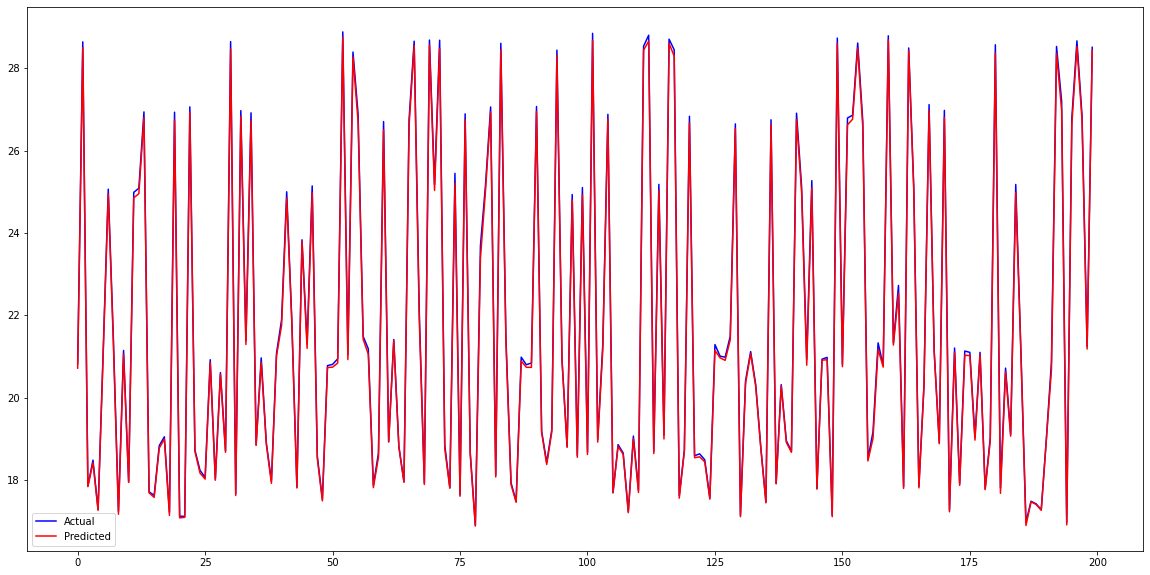

In [9]:
# Train the model
start = time.time()
model.fit(X_train_pca, y_train_pca, epochs=100, verbose=0)
stop = time.time()
nn_pca_train_time = stop - start
print(f"Training time: {nn_pca_train_time}s")

# Predict on test data
y_pred_nn_pca = model.predict(X_test_pca)
model.save('../reports/models/nn_MRT_pca_small_office_model.pkl')

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred_nn_pca)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test_pca[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_nn_pca[:200], color='red', label='Predicted')
plt.legend()
plt.show()

In [10]:
# Save training times to a csv file
import csv

with open('../reports/data/training_times_small_office_MRT.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Model', 'Training time (s)'])
    writer.writerow(['Linear regression', lr_train_time])
    writer.writerow(['Linear regression with PCA', lr_pca_train_time])
    writer.writerow(['Neural network', nn_train_time])
    writer.writerow(['Neural network with PCA', nn_pca_train_time])

### 4. Compare models' results with and without PCA on predicting T

#### 4.1 Split the data into training and testing

In [11]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

# Without PCA
X_train, X_test, y_train, y_test = train_test_split(X_std, y_T, test_size=0.2, random_state=42)

# With PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_T, test_size=0.2, random_state=42)

#### 4.2 Train and evaluate the Linear Regression model

##### 4.2.1 Without PCA

Training time: 0.004322052001953125s
Mean squared error: 0.16577728412217882


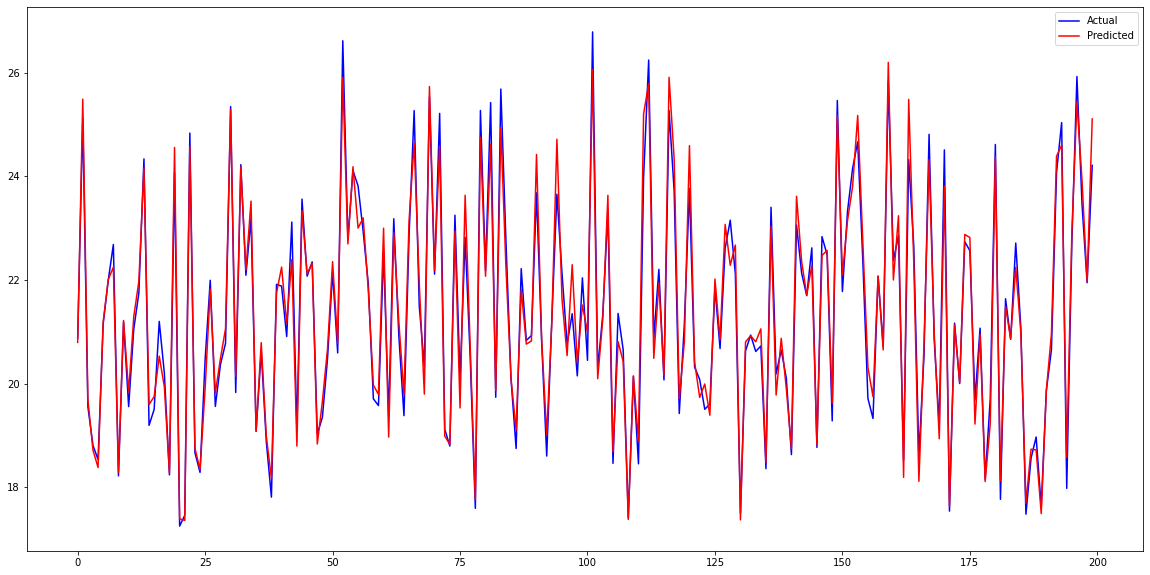

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle
import time

# Train linear regression model on training data
model = LinearRegression()
start = time.time()
model.fit(X_train, y_train)
stop = time.time()
lr_train_time = stop - start
print(f"Training time: {lr_train_time}s")

# Save the model to a pickle file
filename = '../reports/models/lr_T_small_office_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred[:200], color='red', label='Predicted')
plt.legend()
plt.show()

##### 4.2.2 With PCA

Training time: 0.008044004440307617s
Mean squared error: 0.1657772841221792


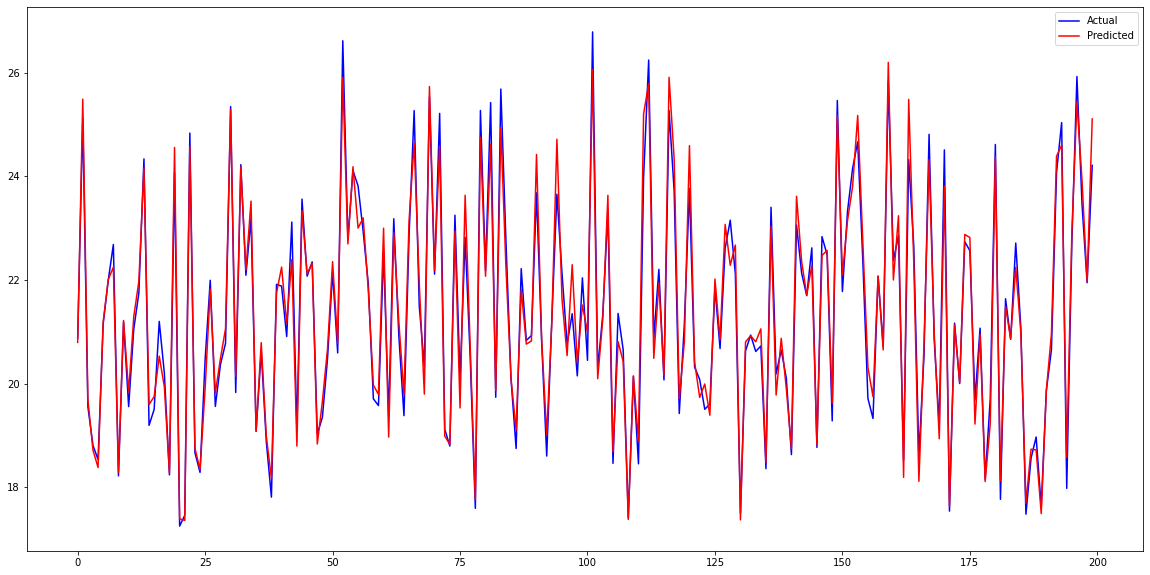

In [13]:
# Train linear regression model on training data
start = time.time()
model.fit(X_train_pca, y_train_pca)
stop = time.time()
lr_pca_train_time = stop - start
print(f"Training time: {lr_pca_train_time}s")

# Predict on test data
y_pred_pca = model.predict(X_test_pca)

# Save the model to a pickle file
filename = '../reports/models/lr_T_pca_small_office_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred_pca)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test_pca[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_pca[:200], color='red', label='Predicted')
plt.legend()
plt.show()

#### 4.3 Train and evaluate the Feedforward Neural Network model

##### 4.2.1 Without PCA

Training time: 67.4417929649353s
INFO:tensorflow:Assets written to: ../reports/models/nn_T_small_office_model.pkl/assets
Mean squared error: 0.08417043735503117


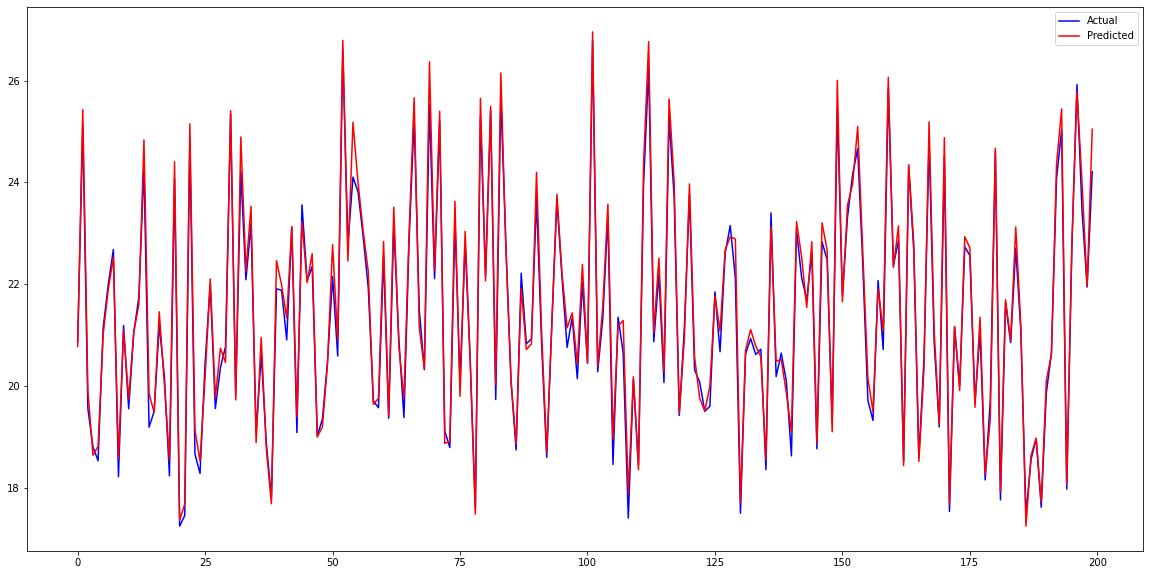

In [14]:
# Create neural network model 
from keras.models import Sequential
from keras.layers import Dense

N_NEURONS = 1024
N_LAYERS = 4

model = Sequential()
model.add(Dense(units=N_NEURONS, input_dim=X.shape[1], activation='relu'))
for i in range(N_LAYERS-1):
    model.add(Dense(units=N_NEURONS, activation='relu'))
model.add(Dense(units=1, activation='linear')) # Output layer
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
start = time.time()
model.fit(X_train, y_train, epochs=100, verbose=0)
stop = time.time()
nn_train_time = stop - start
print(f"Training time: {nn_train_time}s")

# Predict on test data
y_pred_nn = model.predict(X_test)
model.save('../reports/models/nn_T_small_office_model.pkl')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_nn)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_nn[:200], color='red', label='Predicted')
plt.legend()
plt.show()

##### 4.3.2 With PCA

Training time: 66.73648047447205s
INFO:tensorflow:Assets written to: ../reports/models/nn_T_pca_small_office_model.pkl/assets
Mean squared error: 0.015143678320327581


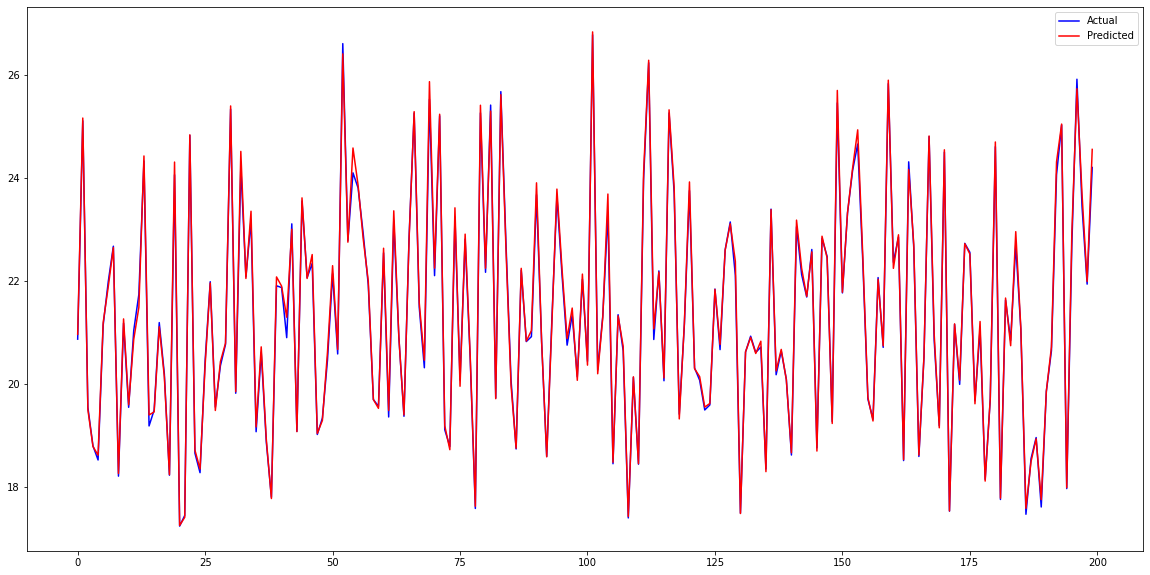

In [15]:
# Train the model
start = time.time()
model.fit(X_train_pca, y_train_pca, epochs=100, verbose=0)
stop = time.time()
nn_pca_train_time = stop - start
print(f"Training time: {nn_pca_train_time}s")

# Predict on test data
y_pred_nn_pca = model.predict(X_test_pca)
model.save('../reports/models/nn_T_pca_small_office_model.pkl')

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred_nn_pca)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test_pca[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_nn_pca[:200], color='red', label='Predicted')
plt.legend()
plt.show()

In [16]:
# Save training times to a csv file
import csv

with open('../reports/data/training_times_small_office_T.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Model', 'Training time (s)'])
    writer.writerow(['Linear regression', lr_train_time])
    writer.writerow(['Linear regression with PCA', lr_pca_train_time])
    writer.writerow(['Neural network', nn_train_time])
    writer.writerow(['Neural network with PCA', nn_pca_train_time])

### 5. Compare models' results with and without PCA on predicting V

#### 5.1 Split the data into training and testing

In [17]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

# Without PCA
X_train, X_test, y_train, y_test = train_test_split(X_std, y_V, test_size=0.2, random_state=42)

# With PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_V, test_size=0.2, random_state=42)

#### 5.2 Train and evaluate the Linear Regression model

##### 5.2.1 Without PCA

Training time: 0.006689786911010742s
Mean squared error: 0.00040041562423062617


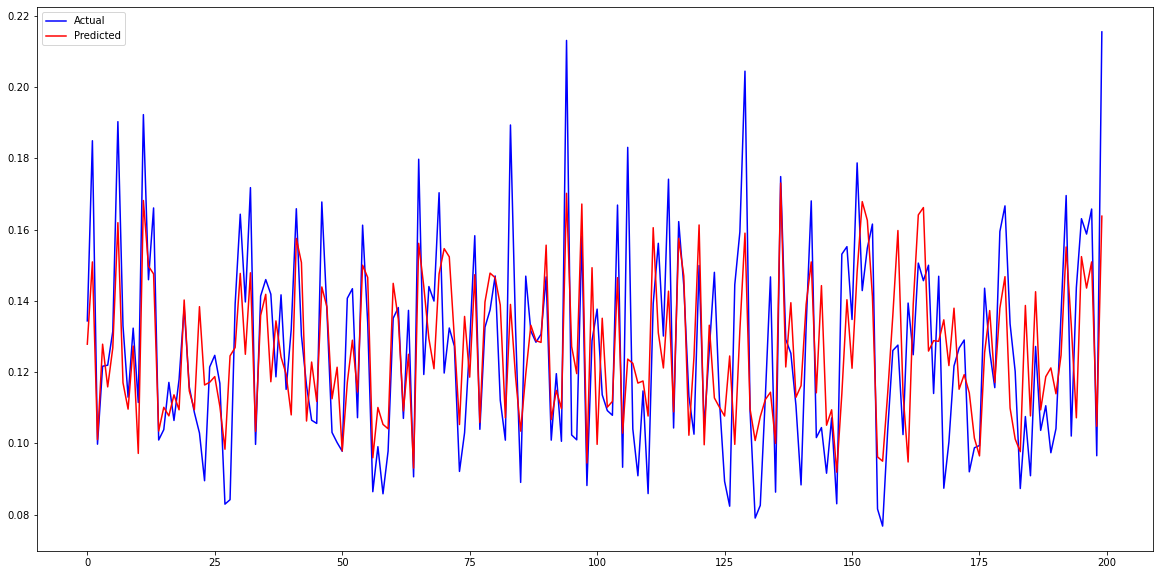

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle
import time

# Train linear regression model on training data
model = LinearRegression()
start = time.time()
model.fit(X_train, y_train)
stop = time.time()
lr_train_time = stop - start
print(f"Training time: {lr_train_time}s")

# Save the model to a pickle file
filename = '../reports/models/lr_V_small_office_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred[:200], color='red', label='Predicted')
plt.legend()
plt.show()

##### 5.2.2 With PCA

Training time: 0.007543802261352539s
Mean squared error: 0.00040041562423062617


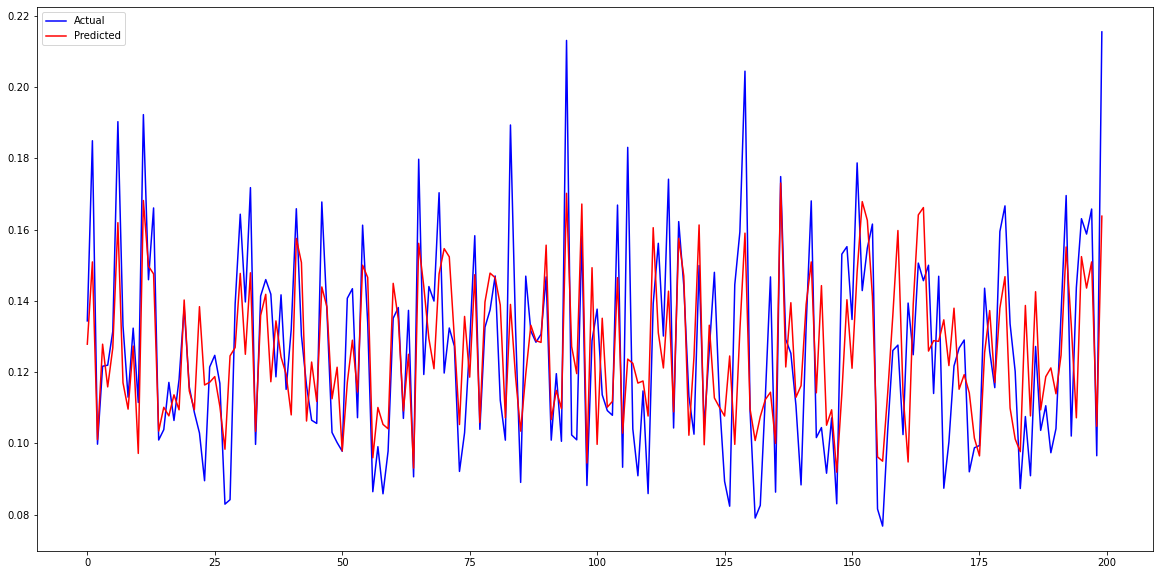

In [19]:
# Train linear regression model on training data
start = time.time()
model.fit(X_train_pca, y_train_pca)
stop = time.time()
lr_pca_train_time = stop - start
print(f"Training time: {lr_pca_train_time}s")

# Predict on test data
y_pred_pca = model.predict(X_test_pca)

# Save the model to a pickle file
filename = '../reports/models/lr_V_pca_small_office_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred_pca)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test_pca[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_pca[:200], color='red', label='Predicted')
plt.legend()
plt.show()

#### 5.3 Train and evaluate the Feedforward Neural Network model

##### 5.2.1 Without PCA

Training time: 64.67390871047974s
INFO:tensorflow:Assets written to: ../reports/models/nn_V_small_office_model.pkl/assets
Mean squared error: 5.5294132801361714e-05


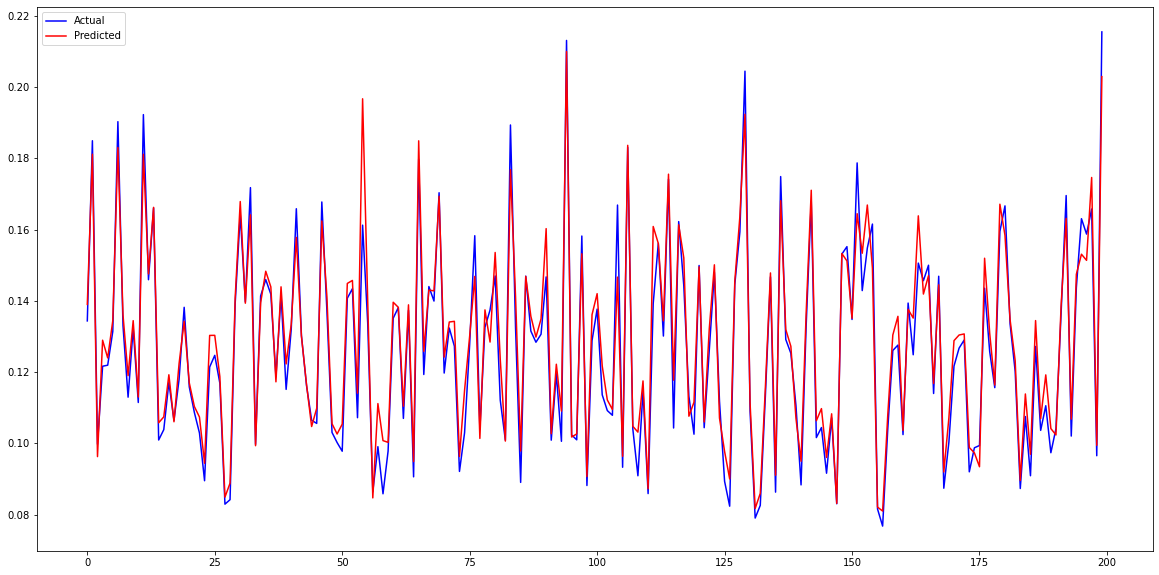

In [20]:
# Create neural network model 
from keras.models import Sequential
from keras.layers import Dense

N_NEURONS = 1024
N_LAYERS = 4

model = Sequential()
model.add(Dense(units=N_NEURONS, input_dim=X.shape[1], activation='relu'))
for i in range(N_LAYERS-1):
    model.add(Dense(units=N_NEURONS, activation='relu'))
model.add(Dense(units=1, activation='linear')) # Output layer
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
start = time.time()
model.fit(X_train, y_train, epochs=100, verbose=0)
stop = time.time()
nn_train_time = stop - start
print(f"Training time: {nn_train_time}s")

# Predict on test data
y_pred_nn = model.predict(X_test)
model.save('../reports/models/nn_V_small_office_model.pkl')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_nn)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_nn[:200], color='red', label='Predicted')
plt.legend()
plt.show()

##### 5.3.2 With PCA

Training time: 63.3362193107605s
INFO:tensorflow:Assets written to: ../reports/models/nn_V_pca_small_office_model.pkl/assets
Mean squared error: 5.3816516939632154e-05


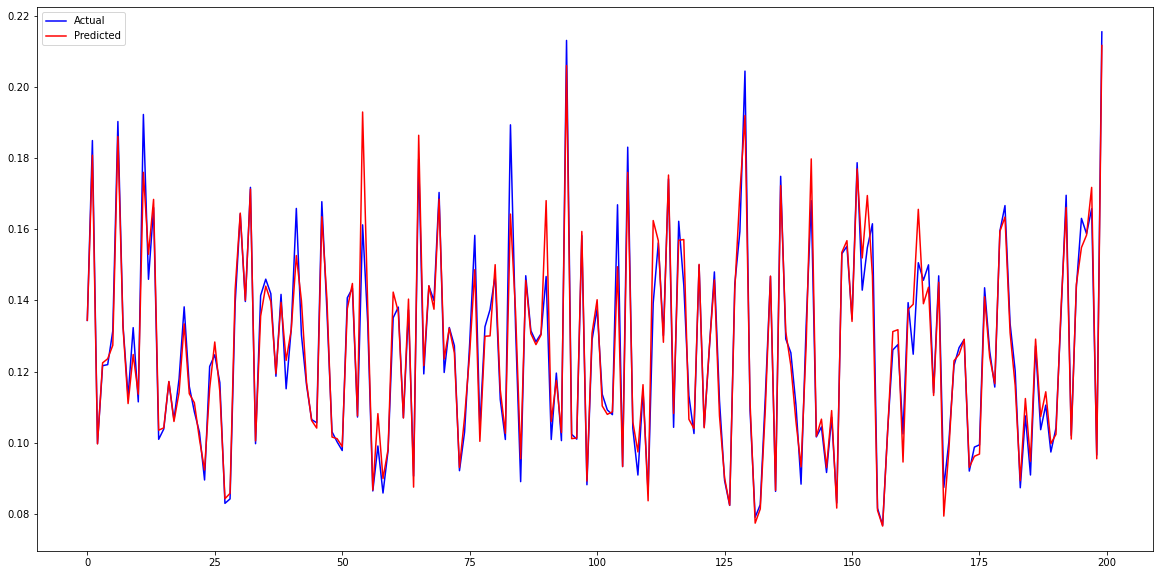

In [21]:
# Train the model
start = time.time()
model.fit(X_train_pca, y_train_pca, epochs=100, verbose=0)
stop = time.time()
nn_pca_train_time = stop - start
print(f"Training time: {nn_pca_train_time}s")

# Predict on test data
y_pred_nn_pca = model.predict(X_test_pca)
model.save('../reports/models/nn_V_pca_small_office_model.pkl')

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred_nn_pca)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test_pca[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_nn_pca[:200], color='red', label='Predicted')
plt.legend()
plt.show()

In [22]:
# Save training times to a csv file
import csv

with open('../reports/data/training_times_small_office_V.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Model', 'Training time (s)'])
    writer.writerow(['Linear regression', lr_train_time])
    writer.writerow(['Linear regression with PCA', lr_pca_train_time])
    writer.writerow(['Neural network', nn_train_time])
    writer.writerow(['Neural network with PCA', nn_pca_train_time])